In [21]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
!rm ~/.keras/datasets/train-images-idx3-ubyte.gz

rm: /Users/raeez/.keras/datasets/train-images-idx3-ubyte.gz: No such file or directory


In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
print(X_train_full.shape) #this contains 60k images of 28x28 array...so this is a 3D array
print(X_train_full.ndim)

(60000, 28, 28)
3


In [14]:
X_train_full


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [16]:
#Make a validation set
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = Y_train_full[:5000], Y_train_full[5000:]


In [63]:
X_test = X_test/255.0

In [18]:
X_train.shape

(55000, 28, 28)

In [53]:
X_valid.shape

(5000, 28, 28)

In [24]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)

In [54]:
X_valid_flatten = X_valid.reshape(len(X_valid), 28*28

In [65]:
import numpy as np
print(np.isnan(X_train).any(), np.isnan(y_train).any())
print(np.isinf(X_train).any(), np.isinf(y_train).any())

False False
False False


In [55]:
X_valid_flatten.shape

(5000, 784)

In [25]:
X_train_flatten.shape

(55000, 784)

In [20]:
# the y labels are indices to class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]

'Coat'

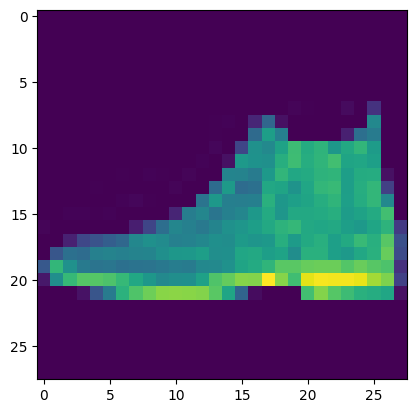

In [22]:
img = X_test[0]
plt.imshow(img)

# Build the model

This MLP has 2 hidden layers

The input layer takes in flattened image of size 784(28*28)

First hidden layer has 300 neurons with RELU act funvtion

Second hidden layer has 100 neurons with RELU act func

Ouptut layer - 10 neurons, one for each class

In [68]:
model  = keras.Sequential([
                #keras.Input(shape=(784,)),
                keras.layers.Flatten(input_shape = [28,28]),
                keras.layers.Dense(300, activation='relu'),
                keras.layers.Dense(100, activation = 'relu'),
                keras.layers.Dense(10, activation = 'softmax')
    ])

/Users/raeez/.pyenv/versions/jupyter-env/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Explore NN structure

In [69]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Look at the layers, pick one of them and look at its weights and biases.
#Note the weights are random and the biases are initialized to 0.
# Dense layers initialize their weights randomly and biases start at 0, unless an initialization function is specified at time of creation.


In [35]:
model.layers

[<Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [37]:
hidden1 = model.layers[0]
hidden1.name
layer1 = model.get_layer(hidden1.name)
weights, biases = hidden1.get_weights()

In [49]:
weights.shape #each of the input 784 features linked to 300 neurons of this hidden layers, 
# so total 784*300 weights here along with 300 biases (one for each neuron)|

(784, 300)

In [50]:
biases.shape

(300,)

In [43]:
(784*300+300)

235500

## Train the model

In [74]:
#Due to sparse labels (only 10 outputs) we’ll use sparse categorical crossentropy for calculating 
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = optimizer,#'sgd',
             metrics=['accuracy'])


In [103]:
X_train.shape

(55000, 28, 28)

In [104]:
55000/32 # by default keras has batch_size =32, so we have around 1719 batches per epoch

1718.75

In [76]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7502 - loss: 0.7418 - val_accuracy: 0.7672 - val_loss: 0.6768
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7726 - loss: 0.6723 - val_accuracy: 0.7854 - val_loss: 0.6301
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7884 - loss: 0.6235 - val_accuracy: 0.8020 - val_loss: 0.5957
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7949 - loss: 0.6001 - val_accuracy: 0.8074 - val_loss: 0.5725
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8041 - loss: 0.5746 - val_accuracy: 0.8134 - val_loss: 0.5548
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8107 - loss: 0.5528 - val_accuracy: 0.8164 - val_loss: 0.5401
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8169 - loss: 0.5398 - val_accuracy: 0.8218 - val_loss: 0.5266
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8197 - loss: 0.5283 - 

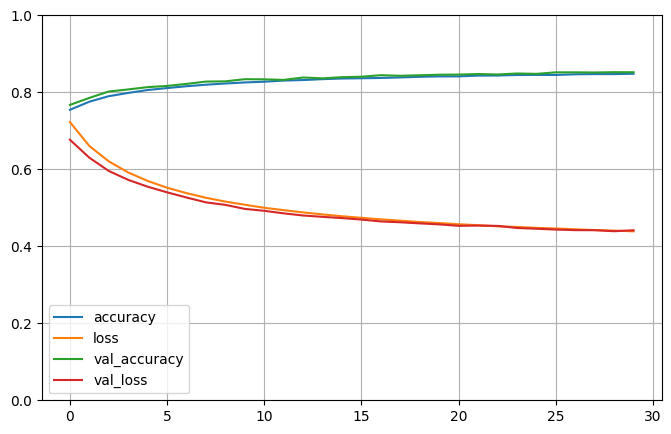

In [77]:
import pandas as pd
import numpy as np
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()


### model evaluation on test set (set that the model has never seen)

In [101]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8363 - loss: 0.4668


In [105]:
print(f"Loss is {loss} and accurcacy is {accuracy}")

Loss is 0.4782786965370178 and accurcacy is 0.8321999907493591


### PREDICTIONS

In [80]:
X_new = X_test[:5]


In [81]:
Y_preds = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


In [83]:
Y_preds.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.17, 0.  , 0.75],
       [0.  , 0.  , 0.91, 0.  , 0.01, 0.  , 0.08, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.24, 0.  , 0.16, 0.01, 0.03, 0.  , 0.54, 0.  , 0.01, 0.  ]],
      dtype=float32)

In [84]:
y_pred = np.argmax(model.predict(X_new), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [85]:
y_pred

array([9, 2, 1, 1, 6])

In [87]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

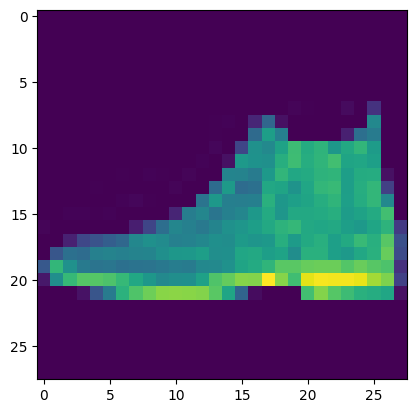

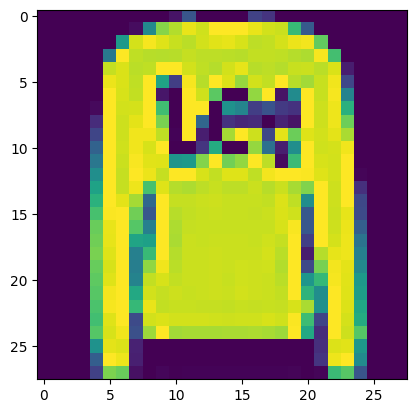

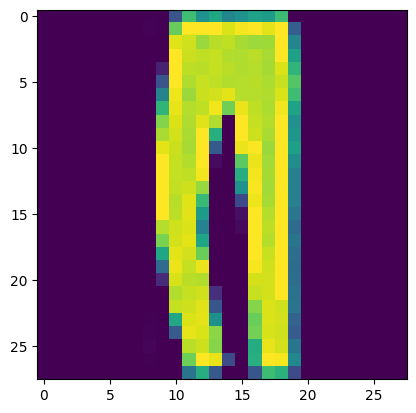

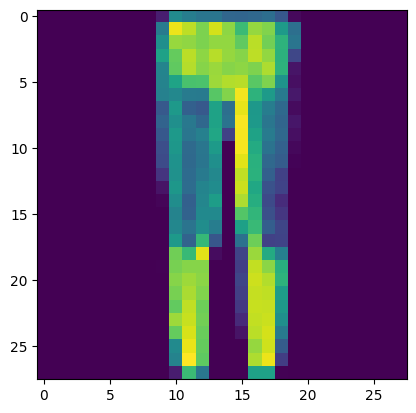

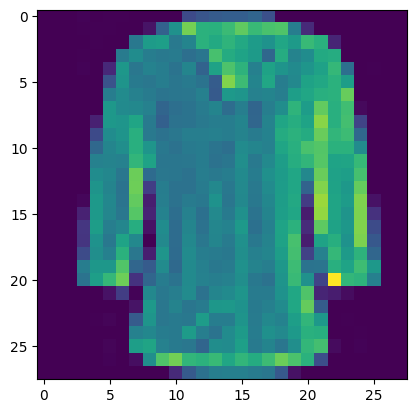

In [98]:
for i in X_new:
    plt.imshow(i)
    plt.show()